<a href="https://colab.research.google.com/github/fabiomiguell/AtividadesMackenzie/blob/main/T4_visualiza%C3%A7%C3%A3o_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Fabio de Oliveira Miguel

Matricula:  92274714

Atividade Trilha 4 - Dataset Netflix

In [ ]:
#importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [ ]:
#upload do arquivo para o google colab

df = pd.read_csv('https://raw.githubusercontent.com/fabiomiguell/AtividadesMackenzie/main/netflix_titles.csv')
data = df
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#mostra detalhe das variaveis(colunas) do database e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Quantidade de linhas e colunas
print(df.shape)

(8807, 12)


In [ ]:
# verificação e remoção de linhas duplicadas caso existam no dataset.
print(df.shape)
df = df.drop_duplicates(keep='first')
print(df.shape)

(8807, 12)
(8807, 12)


In [ ]:
#Verificar colunas com valores nulos
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Análise:** criaremos um novo dataframe com as informações tratadas
 a seguir:

a) as colunas "director", "cast" e "country apresenta elevada quantidade de dados ausentes, dessa forma serão retiradas da análise para evitar distorções;

b) a coluna "Show_id" refere-se a identificação exclusiva de cada linha, assim, também é irrelevante para nossa análise e também será retirada da análise;

c) a coluna "date_added", "rating" e "duration" apresentam poucos registros nulos, que serão removidos;

d) as colunas "date_added", "rating" e "duration" possuem poucos dados ausentes que excluiremos.

In [ ]:
#Eliminando colunas que não iremos usar"
df2 = df.drop(columns=['director','cast','country','show_id'])
#Eliminando linhas com valores ausentes
df2 = df2.dropna()

In [ ]:
#Verificando tamanho da base
print(df2.shape)
#Verificando variáveis ausentes
df2.isnull().sum() 

(8790, 8)


type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Comparando com o dataframe original (8807 linhas com 12 colunas), passamos a ter 8790 linhas com 8 colunas, ou seja, não perdemos qualidade de dados na base.

In [ ]:
#Análise de informações estatísticas
df2.describe() 

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [21]:
# extraindo apenas o ano adicionado da coluna "date_added"

df2['year_added'] = df2['date_added'].str.slice(start=-4)

# agrupando do ano adicionado e tipo, fazendo a contagem na coluna show_id

df_added = df.groupby(['year_added', 'type'], as_index=False).show_id.count()

df_added.columns = ['year_added', 'type', 'count']
df_added = df_added.pivot(index='year_added', columns='type', values='count').reset_index()
df_added.fillna(0, inplace=True)
df_added.tail()

type,year_added,Movie,TV Show
9,2017,839.0,349.0
10,2018,1237.0,412.0
11,2019,1424.0,592.0
12,2020,1284.0,595.0
13,2021,993.0,505.0


In [19]:
#pip install -u plotly
import plotly.express as px

In [22]:
#grafico temporal da total de títulos adicionados na plataforma
px.histogram(df2, x='year_added')

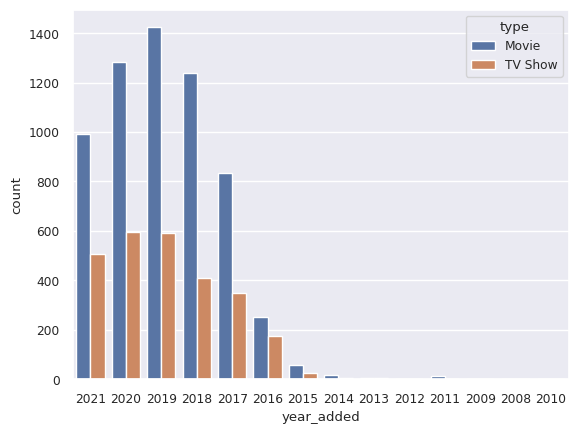

In [23]:
#gráfico temporal de títulos adicionados na plataforma considerando a classificação filmes "movies" e séries "TV Show"
sns.set_theme(style='whitegrid')
sns.set(font_scale=0.8)
sns.countplot(data=df2, x='year_added', hue='type')
plt.show()

In [ ]:
#grafico temporal da total de filmes lançados por ano de lançamento
px.histogram(df, x='release_year')